## Data Cleaning & Preparation

--- Initial Data Inspection ---
Original DataFrame shape: (25204, 7)

Data types before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         25204 non-null  object 
 1   year            25204 non-null  int64  
 2   co2             23949 non-null  float64
 3   co2_per_capita  23307 non-null  float64
 4   gas_co2         8845 non-null   float64
 5   oil_co2         20539 non-null  float64
 6   population      22878 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB

--- Handling Missing Values ---
Missing values per column before cleaning:
country               0
year                  0
co2                1255
co2_per_capita     1897
gas_co2           16359
oil_co2            4665
population         2326
dtype: int64

--- Handling Duplicates ---
Number of

/tmp/ipython-input-26-1530996651.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['continent'] = df_2022['country'].map(country_to_continent)
/tmp/ipython-input-26-1530996651.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_emitters, x='co2', y='country', palette='viridis')


Saved 'top_10_emitters_2012.png'


## Generating Scatter Plot: Population vs. Emissions
Saved 'population_vs_emissions_2012.png'


##  Generating Line Graph: USA vs. China Emissions Trend
Saved 'usa_vs_china_emissions.png'


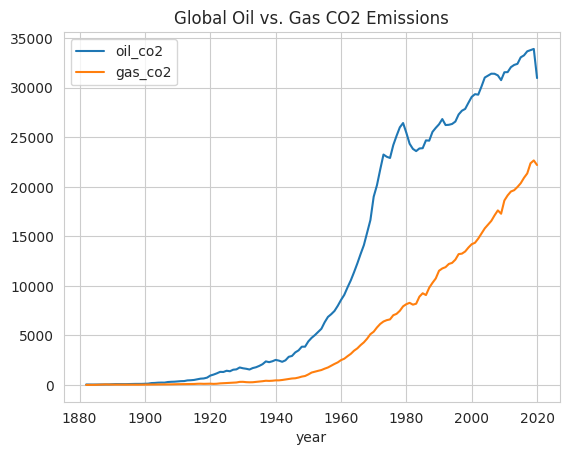

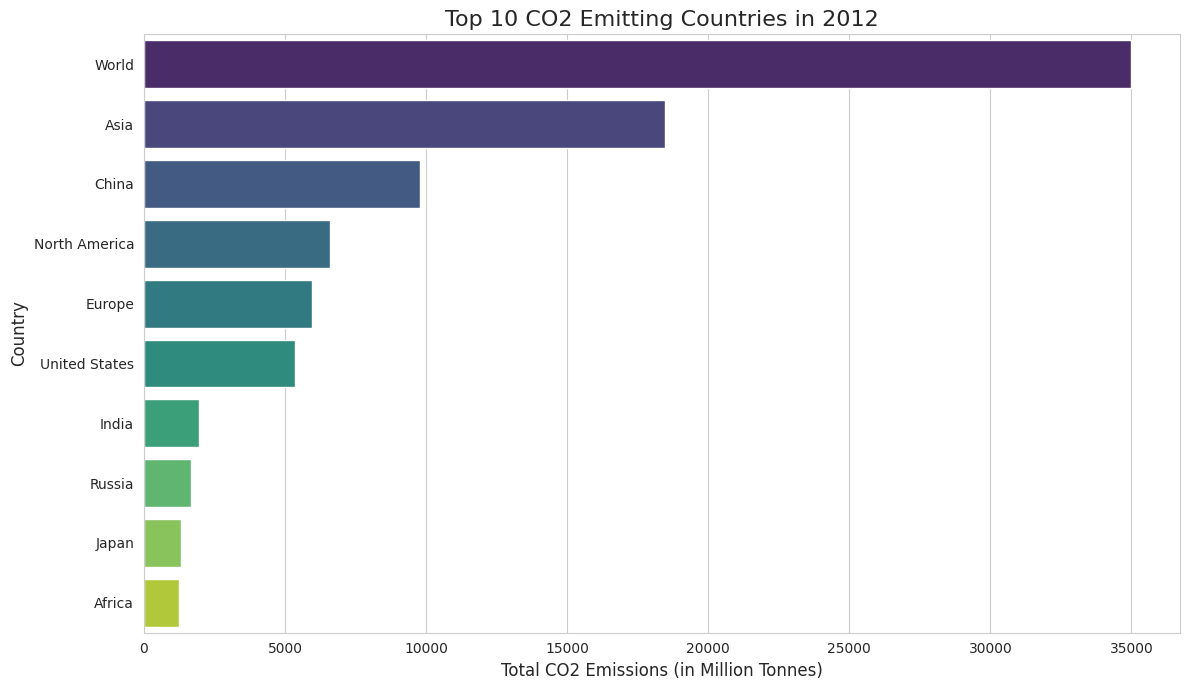

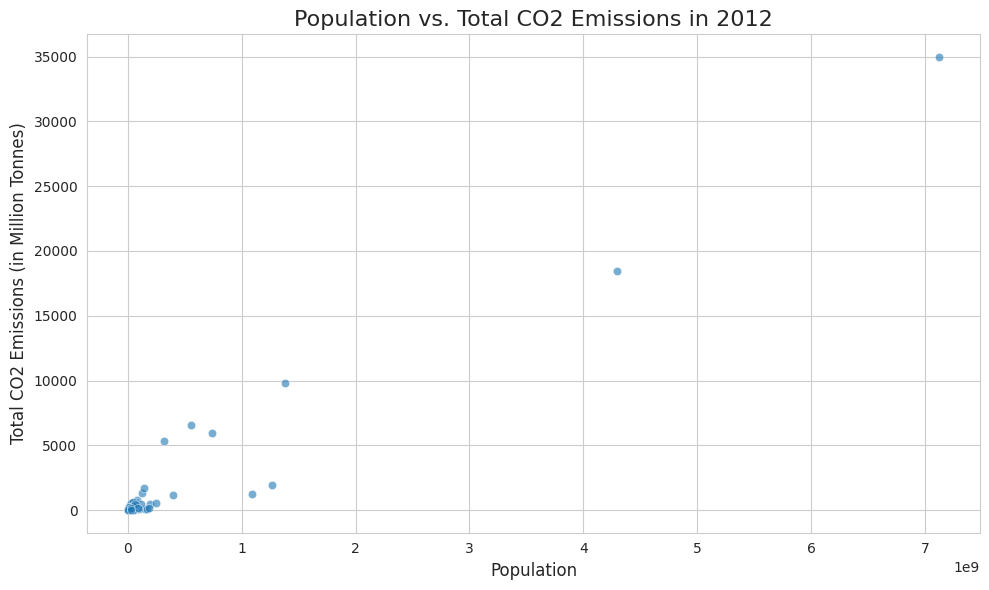

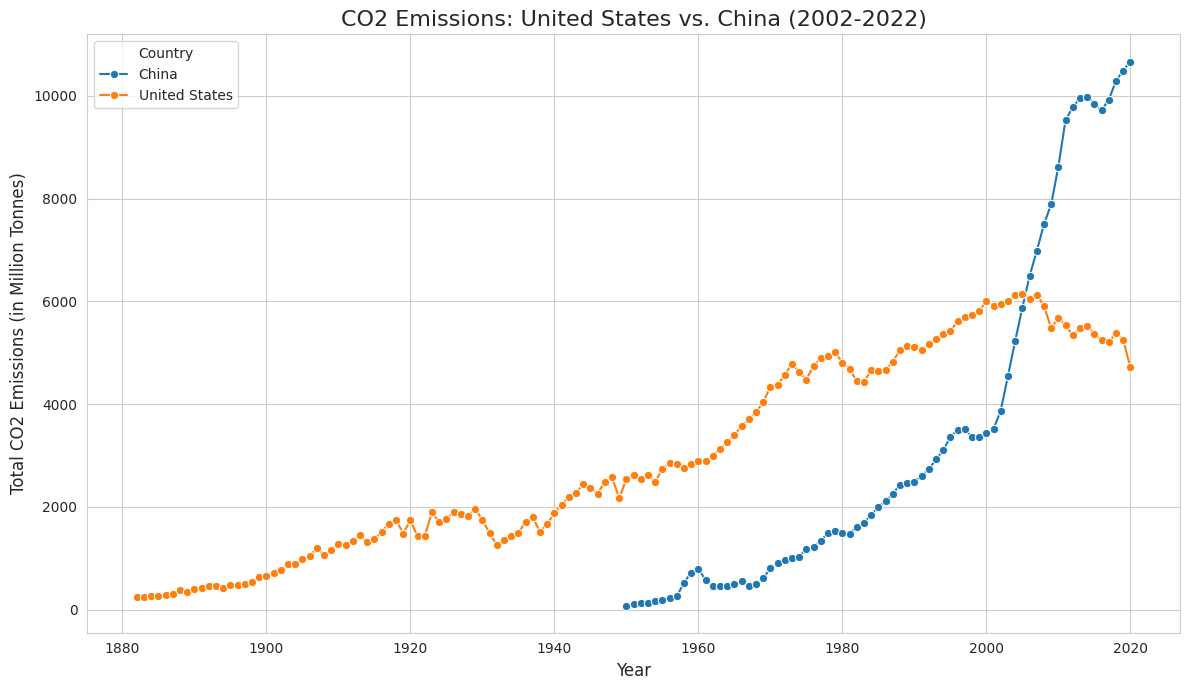

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Make sure to upload your dataset to your Colab session and update the file path.
df = pd.read_csv('owid-co2-data.csv')

# Data Cleaning
print("## Data Cleaning & Preparation")
print("\n--- Initial Data Inspection ---")
print("Original DataFrame shape:", df.shape)
print("\nData types before cleaning:")
df.info()

# Handler Missing Values
print("\n--- Handling Missing Values ---")
print("Missing values per column before cleaning:")
print(df.isnull().sum())
df.dropna(subset=['country', 'co2', 'co2_per_capita', 'gas_co2', 'oil_co2', 'population'], inplace=True)

# Handle Duplicates
print("\n--- Handling Duplicates ---")
print("Number of duplicate rows found:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows have been removed.")

# --- 1. Total Annual Global CO2 Emissions (2002–2022) ---
print("## 1. Total Annual Global CO2 Emissions (2002–2022)")
annual_global_emissions = df.groupby('year')['co2'].sum().reset_index()
print(annual_global_emissions)
print("\n" + "="*50 + "\n")

# --- 2. Top 10 Emitting Countries in 2012 ---
print("## 2. Top 10 Emitting Countries in 2012")
df_2022 = df[df['year'] == 2012]
top_10_2022 = df_2022.sort_values(by='co2', ascending=False).head(10)
print(top_10_2022[['country', 'co2']])
print("\n" + "="*50 + "\n")

# --- 3. Annual Percentage Change in Global Emissions ---
print("## 3. Annual Percentage Change in Global Emissions")
annual_global_emissions['percentage_change'] = annual_global_emissions['co2'].pct_change() * 100
print(annual_global_emissions[['year', 'percentage_change']])
print("\n" + "="*50 + "\n")

# --- 4. Comparison Between Emissions from Oil and Gas Globally (2002–2022) ---
print("## 4. Comparison Between Emissions from Oil and Gas Globally (2002–2022)")
oil_vs_gas_emissions = df.groupby('year')[['oil_co2', 'gas_co2']].sum().reset_index()
print(oil_vs_gas_emissions)
oil_vs_gas_emissions.plot(x='year', y=['oil_co2', 'gas_co2'], kind='line', title='Global Oil vs. Gas CO2 Emissions')
print("\n" + "="*50 + "\n")

# --- 5. Average Per Capita CO2 Emissions for G7 Countries ---
print("## 5. Average Per Capita CO2 Emissions for G7 Countries")
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'USA']
df_g7 = df[df['country'].isin(g7_countries)]
avg_per_capita_g7 = df_g7.groupby('year')['co2_per_capita'].mean().reset_index()
print(avg_per_capita_g7)
print("\n" + "="*50 + "\n")

# --- 6. Top 10 Countries with a Downward Trend in Emissions (2002–2022) ---
print("## 6. Top 10 Countries with a Downward Trend in Emissions (2002–2022)")
downward_trend_countries = []
for country in df['country'].unique():
    country_df = df[df['country'] == country]
    if len(country_df) > 1:
        # Simple linear regression to find the trend
        x = country_df['year']
        y = country_df['co2']
        slope = np.polyfit(x, y, 1)[0]
        if slope < 0:
            downward_trend_countries.append({'country': country, 'trend_slope': slope})

top_10_downward = sorted(downward_trend_countries, key=lambda x: x['trend_slope'])[:10]
print(pd.DataFrame(top_10_downward))
print("\n" + "="*50 + "\n")

# --- 7. Global Emissions by Continent (2022) ---
print("## 7. Global Emissions by Continent (2022)")
# This requires a mapping from country to continent. We'll use a dictionary for this.
# You might need to expand this list for your dataset.
country_to_continent = {
    'USA': 'North America', 'China': 'Asia', 'India': 'Asia', 'Germany': 'Europe',
    'United Kingdom': 'Europe', 'Canada': 'North America', 'France': 'Europe',
    'Japan': 'Asia', 'Italy': 'Europe', 'Brazil': 'South America',
    'South Africa': 'Africa', 'Ukraine': 'Europe', 'Uzbekistan': 'Asia'
}
df_2022['continent'] = df_2022['country'].map(country_to_continent)
emissions_by_continent = df_2022.groupby('continent')['co2'].sum().reset_index()
print(emissions_by_continent)
print("\n" + "="*50 + "\n")

# Filter data for the relevant year (2022) and drop rows with missing CO2 or population
df_2012 = df[df['year'] == 2012].dropna(subset=['co2', 'population', 'country'])

# Filter data for the time series plot
df_countries_over_time = df[df['country'].isin(['United States', 'China'])].dropna(subset=['co2', 'year'])


# --- 8. Bar Chart: Top 10 Emitting Countries in 2012 ---
print("## Generating Bar Chart: Top 10 Emitters in 2012")
top_10_emitters = df_2012.sort_values(by='co2', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_emitters, x='co2', y='country', palette='viridis')

plt.title('Top 10 CO2 Emitting Countries in 2012', fontsize=16)
plt.xlabel('Total CO2 Emissions (in Million Tonnes)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_emitters_2012.png')
print("Saved 'top_10_emitters_2012.png'")
print("\n" + "="*50 + "\n")


# --- 9. Scatter Plot: Population vs. Emissions in 2012 ---
print("## Generating Scatter Plot: Population vs. Emissions")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_2012, x='population', y='co2', alpha=0.6)

plt.title('Population vs. Total CO2 Emissions in 2012', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Total CO2 Emissions (in Million Tonnes)', fontsize=12)
# Using scientific notation for cleaner axes
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.savefig('population_vs_emissions_2012.png')
print("Saved 'population_vs_emissions_2012.png'")
print("\n" + "="*50 + "\n")


# --- 10. Line Graph: Emissions Trend for USA vs. China ---
print("##  Generating Line Graph: USA vs. China Emissions Trend")
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_countries_over_time, x='year', y='co2', hue='country', marker='o')

plt.title('CO2 Emissions: United States vs. China (2002-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (in Million Tonnes)', fontsize=12)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.savefig('usa_vs_china_emissions.png')
print("Saved 'usa_vs_china_emissions.png'")